In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import timeit.
import timeit

In [3]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

21.4 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
vaini to
caravelas br
mataura pf
gigmoto ph
nizhneyansk ru
ushuaia ar
vardo no
thompson ca
busselton au
broome au
leningradskiy ru
rikitea pf
ushuaia ar
castro cl
rikitea pf
qaanaaq gl
iqaluit ca
hermanus za
esperance au
zalari ru
guerrero negro mx
salinopolis br
mount gambier au
waipawa nz
taolanaro mg
kaitangata nz
mar del plata ar
paamiut gl
rajakhera in
taolanaro mg
chuy uy
severomuysk ru
taolanaro mg
provideniya ru
hithadhoo mv
hilo us
ushuaia ar
vaini to
gualaquiza ec
quatre cocos mu
busselton au
bur gabo so
colac au
hermanus za
barentsburg sj
dwarka in
rikitea pf
pacific grove us
yellowknife ca
chebenki ru
liverpool ca
upernavik gl
matara lk
lavrentiya ru
dikson ru
kibara tz
naze jp
upernavik gl
north bend us
mataura pf
dikson ru
bredasdorp za
falealupo ws
bozoum cf
busselton au
castro cl
albany au
samusu ws
albany au
hammerfest no
artyom az
dunedin nz
bluff nz
fortuna us
sao jose da coroa grande br
porto-vecchio fr
tema gh
nguiu au
beringovskiy ru
saquarema br
saint-p

saldanha za
kudahuvadhoo mv
ribeira grande pt
sumbe ao
ushuaia ar
lebu cl
mar del plata ar
ushuaia ar
port elizabeth za
port alfred za
muros es
azul ar
ponta do sol cv
kapaa us
belushya guba ru
miraflores co
kapaa us
baykit ru
mataura pf
tuktoyaktuk ca
grand river south east mu
kaka tm
ushuaia ar
vaini to
okhotsk ru
hermanus za
thompson ca
airai pw
shache cn
mahebourg mu
minab ir
namibe ao
provideniya ru
jiangyou cn
mataura pf
kodiak us
geraldton au
ilulissat gl
ancud cl
ribeira grande pt
pevek ru
gloversville us
isangel vu
santa cruz cr
bethel us
ajdabiya ly
itarema br
jamestown sh
tezu in
busselton au
marcona pe
hobart au
luwuk id
rikitea pf
atuona pf
punta arenas cl
isangel vu
provideniya ru
porgera pg
rikitea pf
kleinmachnow de
grand gaube mu
mount gambier au
bluff nz
stornoway gb
lazaro cardenas mx
jamestown sh
mecca sa
jamestown sh
atasu kz
port alfred za
beringovskiy ru
rikitea pf
ngukurr au
dikson ru
ixtapa mx
puerto ayora ec
orissaare ee
jamestown sh
kaitangata nz
kiama au
her

jamestown sh
peniche pt
punta arenas cl
port alfred za
flinders au
ushuaia ar
kaeo nz
ushuaia ar
corinto ni
albany au
hithadhoo mv
mount isa au
albany au
aybak af
tiksi ru
tuatapere nz
port elizabeth za
dikson ru
cayambe ec
jamestown sh
rio grande br
nizhneyansk ru
port alfred za
bobcaygeon ca
goderich sl
grand river south east mu
rikitea pf
puerto ayora ec
avarua ck
villa carlos paz ar
andijon uz
bluff nz
komsomolskiy ru
albany au
jamestown sh
mataura pf
hobart au
rio gallegos ar
puerto ayora ec
damphu bt
hamilton bm
nabire id
butaritari ki
new norfolk au
port alfred za
bluff nz
basco ph
katsuura jp
manta ec
tasiilaq gl
barentsburg sj
kruisfontein za
chokurdakh ru
vaini to
hermanus za
cape town za
punta arenas cl


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [9]:
# Import requests library
import requests

# Import the API key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f067252b758fd01835265f478e62854b


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | gigmoto
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | zalari
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | salinopolis
Processing Record 22 of Set 1 | mount gambier
Processing Rec

Processing Record 41 of Set 4 | healdsburg
Processing Record 42 of Set 4 | burica
City not found. Skipping...
Processing Record 43 of Set 4 | boa vista
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | sarab
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | punta alta
Processing Record 48 of Set 4 | bourail
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | wanaka
Processing Record 2 of Set 5 | merrill
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | itarare
Processing Record 6 of Set 5 | ecija
Processing Record 7 of Set 5 | gorontalo
Processing Record 8 of Set 5 | batagay
Processing Record 9 of Set 5 | birao
Processing Record 10 of Set 5 | bontang
Processing Record 11 of Set 5 | dipkarpaz
City not found. Skipping...
Processing Record 12 of Set 5 | saurimo
Processing Record 13 of Set 

Processing Record 30 of Set 8 | tezu
Processing Record 31 of Set 8 | luwuk
Processing Record 32 of Set 8 | porgera
Processing Record 33 of Set 8 | kleinmachnow
Processing Record 34 of Set 8 | stornoway
Processing Record 35 of Set 8 | mecca
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | orissaare
Processing Record 40 of Set 8 | kiama
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | thiruvananthapuram
Processing Record 43 of Set 8 | volno-nadezhdinskoye
Processing Record 44 of Set 8 | kitimat
Processing Record 45 of Set 8 | yeppoon
Processing Record 46 of Set 8 | doha
Processing Record 47 of Set 8 | micheweni
Processing Record 48 of Set 8 | yendi
Processing Record 49 of Set 8 | hovd
Processing Record 50 of Set 8 | maumere
Processing Record 1 of Set 9 | hamilton
Processing Record 2 of Set 9 | iquitos
Processing Record 3 of Set 9 | sr

Processing Record 18 of Set 12 | mayumba
Processing Record 19 of Set 12 | ulladulla
Processing Record 20 of Set 12 | portree
Processing Record 21 of Set 12 | chibombo
Processing Record 22 of Set 12 | sault sainte marie
Processing Record 23 of Set 12 | oranjemund
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | yangjiang
Processing Record 26 of Set 12 | madingou
Processing Record 27 of Set 12 | buta
Processing Record 28 of Set 12 | finspang
Processing Record 29 of Set 12 | praya
Processing Record 30 of Set 12 | barstow
Processing Record 31 of Set 12 | una
Processing Record 32 of Set 12 | loandjili
Processing Record 33 of Set 12 | denizli
Processing Record 34 of Set 12 | kununurra
Processing Record 35 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 12 | ust-ilimsk
Processing Record 37 of Set 12 | tyukalinsk
Processing Record 38 of Set 12 | gunjur
Processing Record 39 of Set 12 | kushiro
Processing Record 40 of Set 12 | hailar


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-23.80,69,1,14.97,US,2021-02-03 01:19:29
1,Vaini,-21.2000,-175.2000,82.40,89,75,8.05,TO,2021-02-03 01:23:03
2,Caravelas,-17.7125,-39.2481,76.19,85,100,5.70,BR,2021-02-03 01:23:03
3,Mataura,-46.1927,168.8643,66.04,68,81,7.99,NZ,2021-02-03 01:19:18
4,Gigmoto,13.7796,124.3900,80.42,79,41,15.95,PH,2021-02-03 01:23:03
5,Ushuaia,-54.8000,-68.3000,53.60,76,75,31.07,AR,2021-02-03 01:22:58
6,Vardo,70.3705,31.1107,26.35,91,98,24.20,NO,2021-02-03 01:19:01
7,Thompson,55.7435,-97.8558,15.80,92,90,4.61,CA,2021-02-03 01:21:20
8,Busselton,-33.6500,115.3333,73.99,65,2,5.01,AU,2021-02-03 01:23:04
9,Broome,42.2506,-75.8330,25.00,86,90,12.66,US,2021-02-03 01:23:04


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

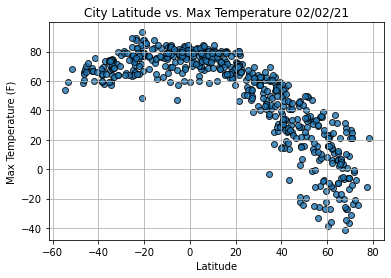

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

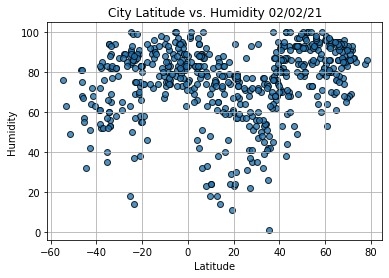

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


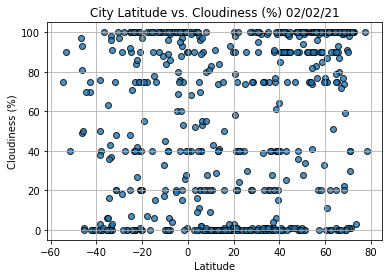

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

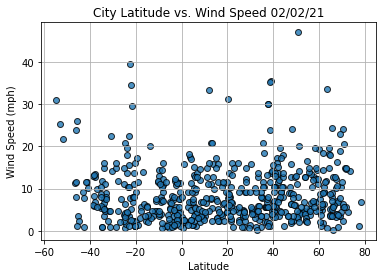

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-23.80,69,1,14.97,US,2021-02-03 01:19:29
4,Gigmoto,13.7796,124.3900,80.42,79,41,15.95,PH,2021-02-03 01:23:03
6,Vardo,70.3705,31.1107,26.35,91,98,24.20,NO,2021-02-03 01:19:01
7,Thompson,55.7435,-97.8558,15.80,92,90,4.61,CA,2021-02-03 01:21:20
9,Broome,42.2506,-75.8330,25.00,86,90,12.66,US,2021-02-03 01:23:04


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

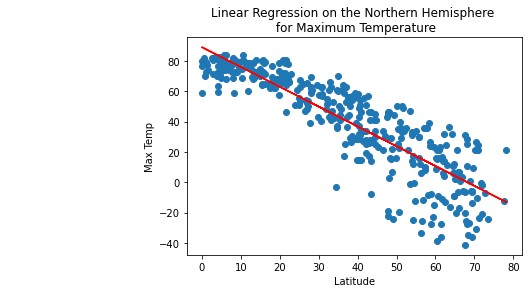

In [23]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       'Max Temp',(-50,90))

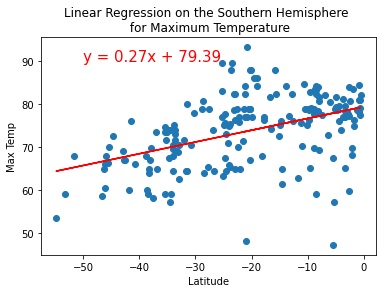

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temp",
                       (-50,90))

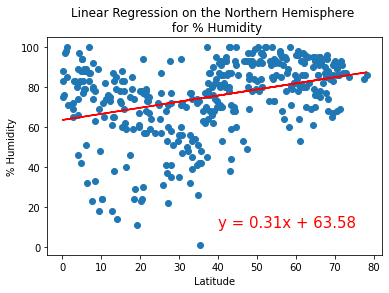

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (40,10))

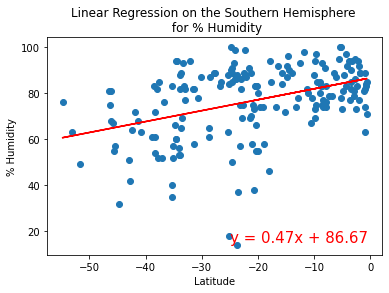

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",
                       (-25,15))

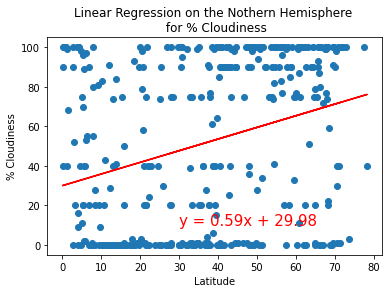

In [27]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Nothern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",
                       (30,10))

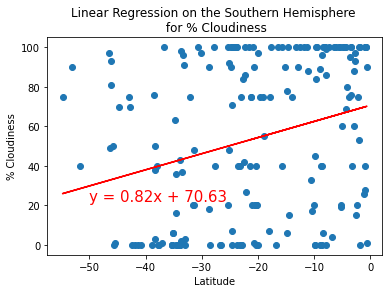

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-50,22))

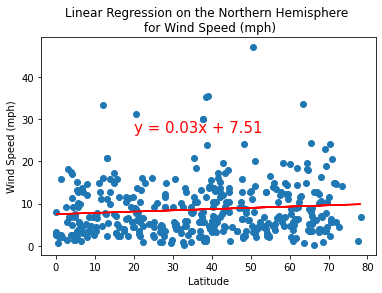

In [29]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)",
                       (20,27))

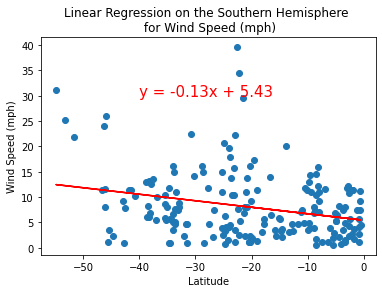

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)",
                       (-40, 30))